# Set up

In [1]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = dd.read_csv('pooled_clean.csv')

In [3]:
df['country'].value_counts().compute() / df.shape[0].compute()

IA    0.893529
PK    0.055867
NP    0.050604
Name: country, dtype: float64

# Check the Distribution of Label

In [4]:
y_dist = df['violence'].value_counts().compute()

In [18]:
y_dist['violence'] / df.shape[0].compute()

0    0.699847
1    0.300153
Name: violence, dtype: float64

In [5]:
y_dist = y_dist.to_frame().reset_index()# = y_dist.to_frame()

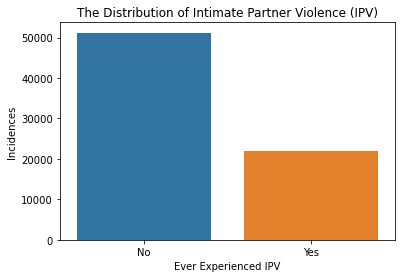

In [6]:
fig1 = sns.barplot(x='index', y='violence',data=y_dist)
fig1.set_title('The Distribution of Intimate Partner Violence (IPV)')
fig1.set_ylabel('Incidences')
fig1.set_xlabel('Ever Experienced IPV')
fig1.set_xticklabels(["No", "Yes"])
plt.savefig("fig1.png")
plt.show()

# Exploratory Analysis

## fam_ipv and violence

In [7]:
df2 = df.groupby('fam_ipv').violence.mean().compute()

In [8]:
df2 = df2.to_frame()
df2.reset_index(inplace=True)

In [9]:
df2

,fam_ipv,violence
0,0,0.239418
1,1,0.578538


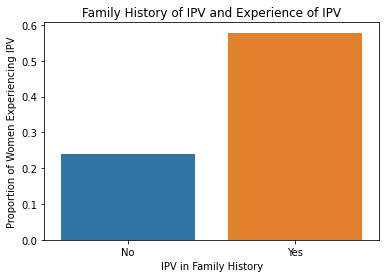

In [10]:
plt.close()
fig2 = sns.barplot(x='fam_ipv', y='violence',data=df2)
fig2.set_title('Family History of IPV and Experience of IPV')
fig2.set_ylabel('Proportion of Women Experiencing IPV')
fig2.set_xlabel('IPV in Family History')
fig2.set_xticklabels(["No", "Yes"])
plt.savefig("fig2.png")
plt.show()

## Partner's Education and IPV

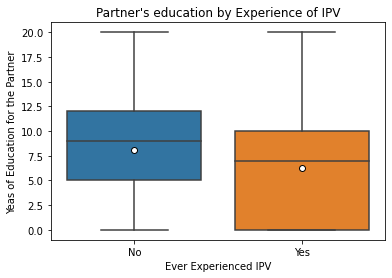

In [11]:
plt.close()
fig3 = sns.boxplot(x="violence", y="part_edu", data=df.compute(), 
                   showmeans=True,
                      meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                        "markersize":"6"})
fig3.set_title('Partner\'s education by Experience of IPV')
fig3.set_xlabel('Ever Experienced IPV')
fig3.set_xticklabels(["No", "Yes"])
fig3.set_ylabel('Yeas of Education for the Partner')
plt.savefig("fig3.png")
plt.show()

## Use of Alcohol by Partner and IPV

In [12]:
df4 = df.groupby('alcohol').violence.mean().compute()
df4 = df4.to_frame()
df4.reset_index(inplace=True)

In [13]:
df4

,alcohol,violence
0,0,0.223877
1,1,0.486381


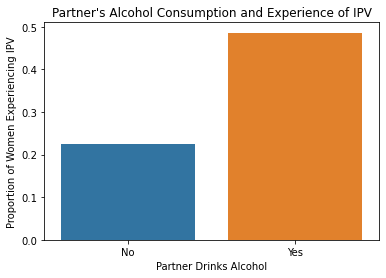

In [14]:
plt.close()
fig4 = sns.barplot(x='alcohol', y='violence',data=df4)
fig4.set_title('Partner\'s Alcohol Consumption and Experience of IPV')
fig4.set_ylabel('Proportion of Women Experiencing IPV')
fig4.set_xlabel('Partner Drinks Alcohol')
fig4.set_xticklabels(["No", "Yes"])
plt.savefig("fig4.png")
plt.show()

## Women's Education and IPV

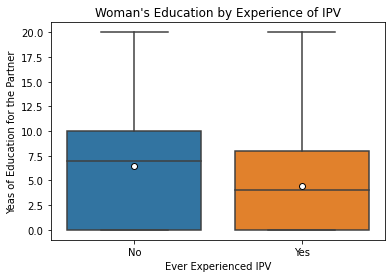

In [15]:
plt.close()
fig5 = sns.boxplot(x="violence", y="edu", data=df.compute(), 
                   showmeans=True,
                      meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                        "markersize":"6"})
fig5.set_title('Woman\'s Education by Experience of IPV')
fig5.set_xlabel('Ever Experienced IPV')
fig5.set_xticklabels(["No", "Yes"])
fig5.set_ylabel('Yeas of Education for the Partner')
plt.savefig("fig5.png")
plt.show()